In [1]:
%matplotlib widget
# To support seeing my workspace only for python files
import sys
import os
import re
import tarfile
import requests
import numpy as np
from pathlib import Path
_my_worksparce = os.getcwd()
sys.path.append(_my_worksparce)
#from scipy.signal import butter, filtfilt, spectrogram, butter
import tensorflow as tf
import tensorflow_hub as hub
import librosa 
#import matplotlib.pyplot as plt
#from scipy.io import wavfile
from utils.functions import *
import matplotlib.pyplot as plt
plt.ion() # Turn on the interactive mode

To install packages:
`python -m pip install [package name]`

In [2]:
#############
# CONSTANTS #
#############
MY_WORKSPACE = Path(_my_worksparce)
# Resource_directory is where the WAV files are stored
resource_directory = MY_WORKSPACE / "resource3"
filtered_output_directory = MY_WORKSPACE / "filtered" 

# Define the URL and local path for the model
# model_url = "https://tfhub.dev/google/yamnet/1"
# model = hub.load(model_url) # Load pre-trained TensorFlow model
#local_model_path = "yamnet_model"

In [3]:

#! Part One - plotting the signals, fft, spectrogram
# os.listdir(resource_directory)
# print(resource_directory)
# apply_to_all_wav_files(resource_directory, apply_fft_and_display)
# apply_to_all_wav_files(resource_directory, apply_spectrogram_and_display)
# apply_to_all_wav_files(resource_directory, filter_and_display)
# apply_to_all_wav_files(resource_directory, spectrogram_fft_before_and_after_filter)

file number = ZOOM0077.WAV
audio length = 10938176
Number of intervals: 31
Average first peak time: 0.9343083900226756 seconds
BR = 64 breaths in one minute


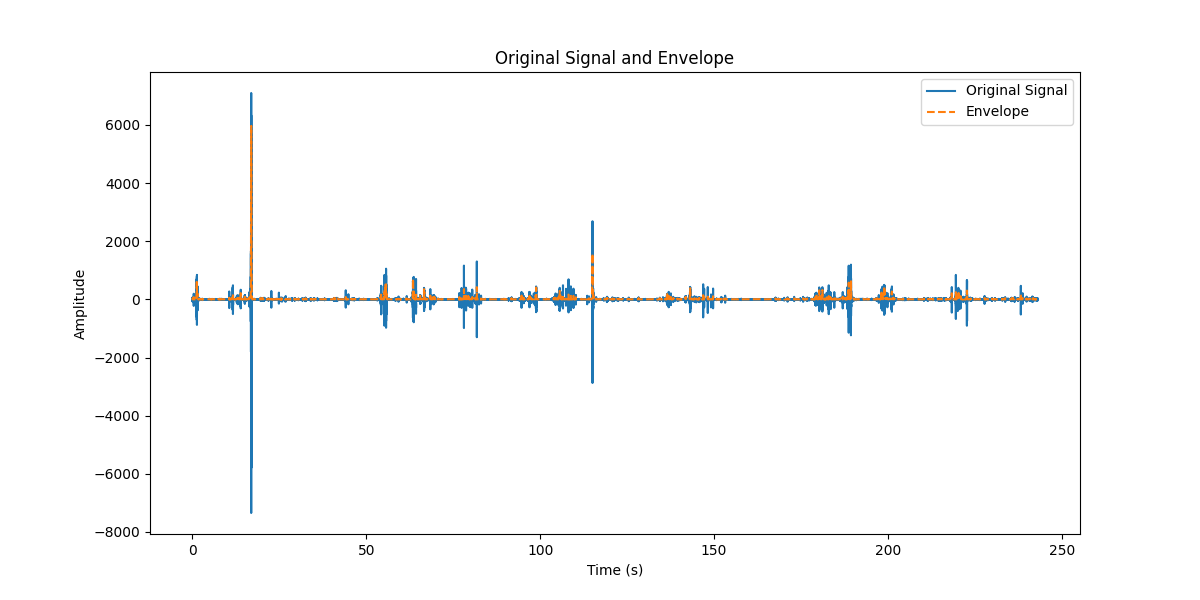

file number = ZOOM0079.WAV
audio length = 5064064
Number of intervals: 13
No valid peaks found.


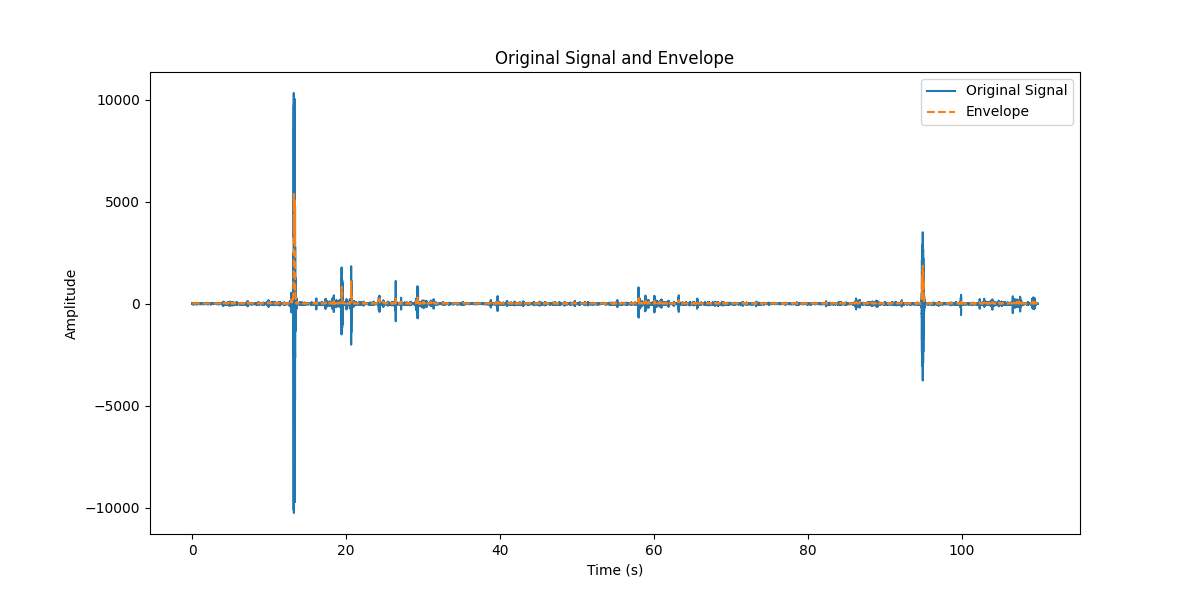

file number = ZOOM0081.WAV
audio length = 9211264
Number of intervals: 26
Average first peak time: 1.1667800453514738 seconds
BR = 51 breaths in one minute


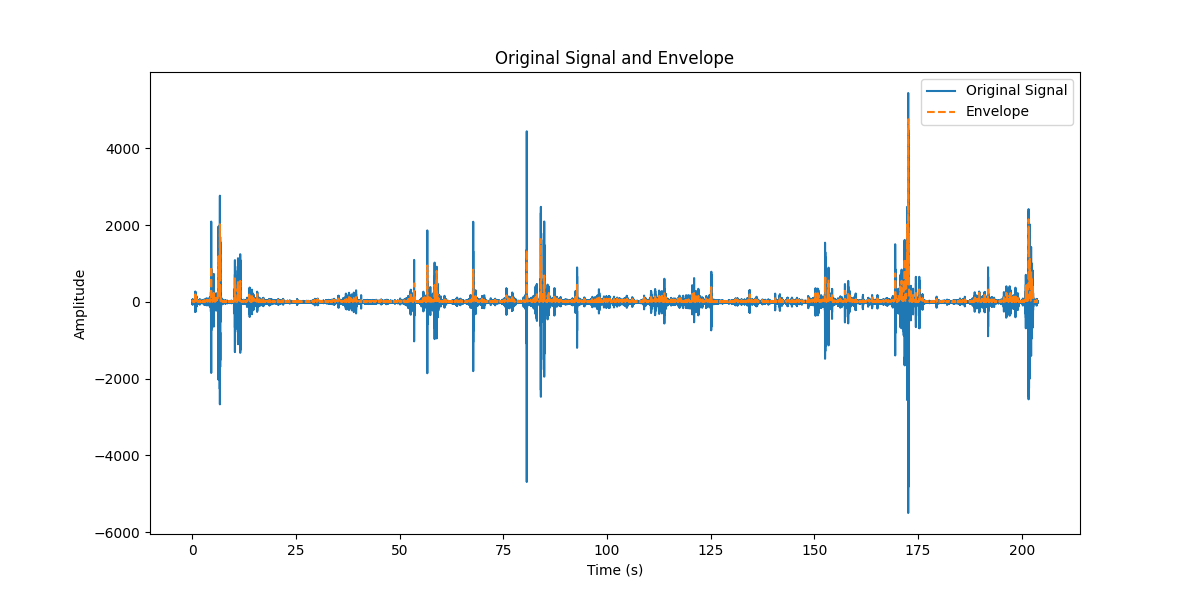

file number = ZOOM0084.WAV
audio length = 7994368
Number of intervals: 22
No valid peaks found.


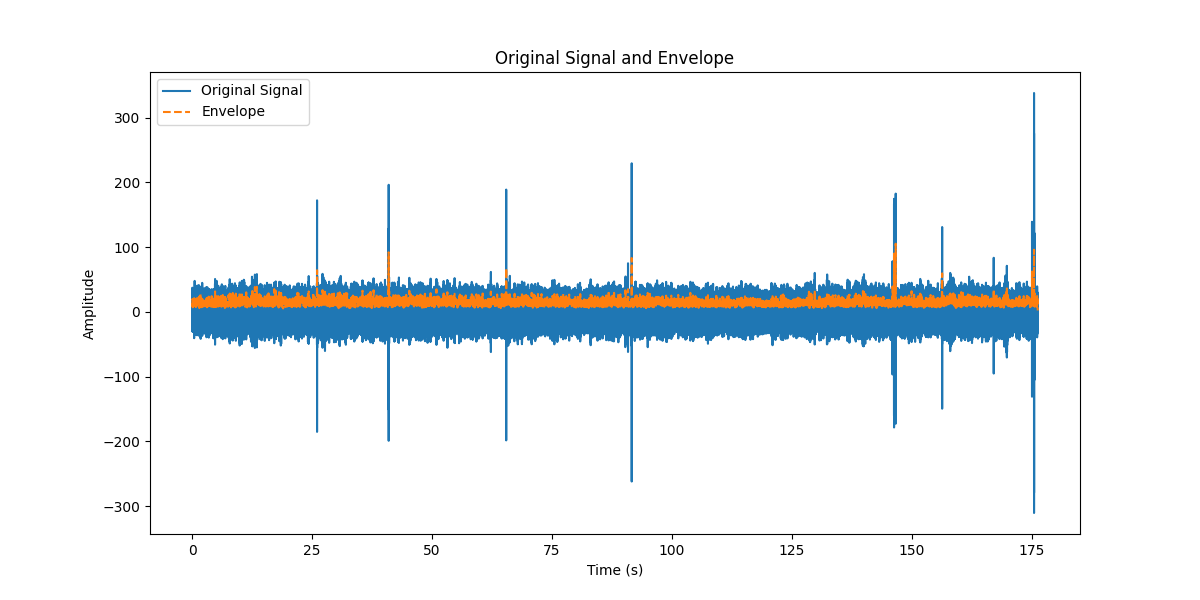

file number = ZOOM0085.WAV
audio length = 5538560
Number of intervals: 15
No valid peaks found.


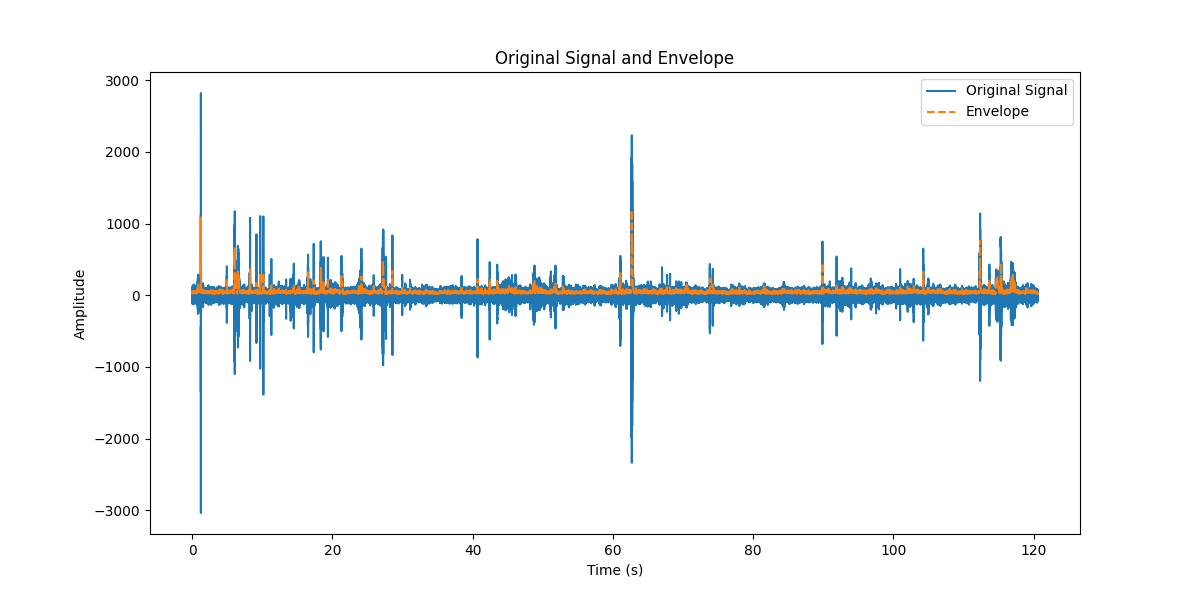

file number = ZOOM0093.WAV
audio length = 8924096
Number of intervals: 25
No valid peaks found.


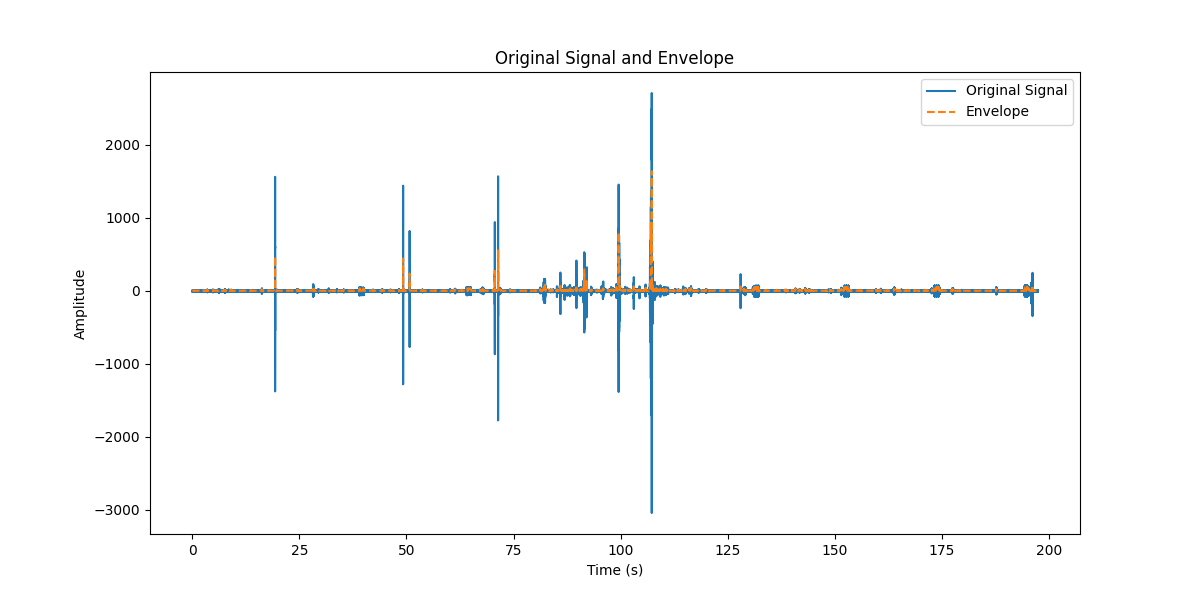

file number = ZOOM0094.WAV
audio length = 15956096


In [4]:

#! part two - feature extruction
# Define the class indices for "Alarm" and "Music"
# target_class_names = ["Alarm", "Breathing"]
# class_names = load_class_names()
# target_class_indices = {name: class_names.index(name) for name in target_class_names if name in class_names}

for filename in os.listdir(resource_directory):
    # Check if the file is a WAV file
    if filename.endswith(".WAV"):
        # Construct the full file path
        filepath = os.path.join(resource_directory, filename)
        print(f"file number = {filename}")
        # Load and process the audio file
        audio, fs_rate = load_wav(filepath)
        print(f"audio length = {len(audio)}")
        filtered_audio = chebyshev_bandpass_filter(audio, 1000 ,10000, fs_rate, ripple=20)

        
        high_quality_intervals, average_first_peak_time = process_audio(filtered_audio[220500:], fs_rate) #! without the first 5 sec
    
        # # Process the audio file to calculate spectral centroid and energy ratio
        # spectral_centroid, energy_ratio = process_audio_features(filepath)
        # print(f"Spectral Centroid for {filename}: {spectral_centroid}")
        # print(f"Energy Ratio for {filename}: {energy_ratio}")
        
        
        # filtered_audio = bandpass_filter(audio, fs_rate)
        # normalize_audio = normalize_signal(filtered_audio) 
        # # Process the audio file to find breath intervals
        # breath_intervals = process_audio_with_breath_detection(normalize_audio, fs_rate)
        # print("Breath intervals (start, end) in samples:", breath_intervals)
        
        
        # # Load and process the audio file
        # wav_bytes = load_wav_bytes(filepath)
        # # Make predictions with the model
        # scores, embeddings, spectrogram = model(wav_bytes)
        
        # # Interpret the predictions with finer temporal segmentation
        # frame_step = 0.48  # Frame step in seconds
        # detected_segments = interpret_predictions(scores.numpy(), target_class_indices, frame_step=frame_step)
        # # Print detected segments
        # for class_name, segments in detected_segments.items():
        #     print(f"Detected '{class_name}' in segments: {segments}")
        
        # # Visualize the waveform, spectrogram, and top classes
        # spectrogram_db = librosa.power_to_db(spectrogram.numpy(), ref=np.max)
        # visualize_audio(filtered_audio, spectrogram_db, scores.numpy(), class_names)